# 1.1: Basic Concepts in Percolation

Generates an LxL lattice of points (sites) occupied with probability p, corresponding to a course grained porus medium of porosity of p.

- basically a cross section of a sponge

C:\Users\gronk\AppData\Local\Temp\ipykernel_24024\459268985.py:11: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  lw, num = measurements.label(m)
C:\Users\gronk\AppData\Local\Temp\ipykernel_24024\459268985.py:12: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  area = measurements.sum(m, lw, index = np.arange(lw.max() + 1))


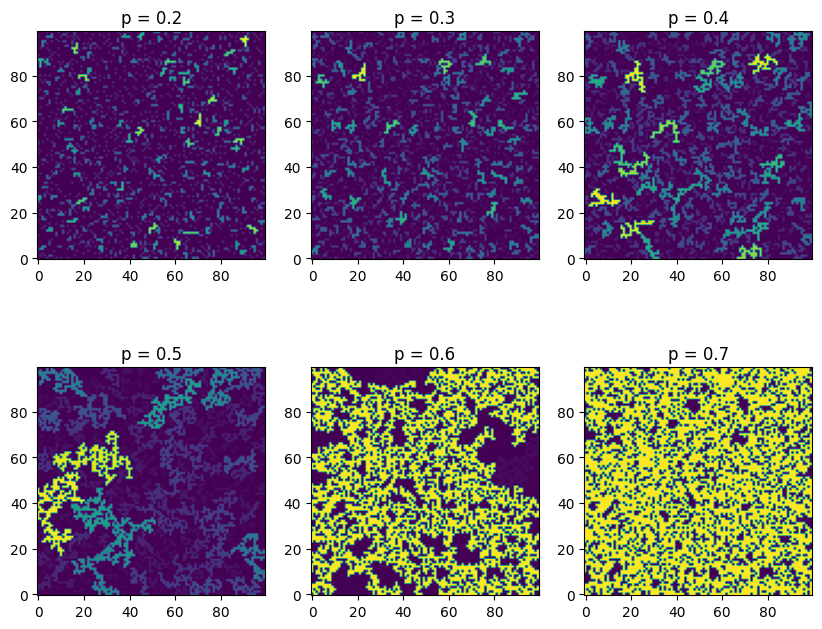

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.ndimage import measurements
plt.figure(figsize=(10,8))
L = 100
pv = [.2,.3,.4,.5,.6,.7]
z = np.random.rand(L,L)
for i in range(len(pv)):
    p = pv[i]
    m = z<p
    lw, num = measurements.label(m)
    area = measurements.sum(m, lw, index = np.arange(lw.max() + 1))
    areaImg = area[lw]
    plt.subplot(2,3,i+1)
    title = 'p = ' + str(p)
    plt.imshow(areaImg, origin='lower')
    plt.title(title)

# 1.2: Percolation Probability

When there exists a path connecting one side to another, a system is percolating. This occers at some value Pc

However: in a finite system Pc is different under every simulation

This can be characterized with Π(p, L):
Π is the probability for percolation to occur as a function of p in a system of size li

- Really, the function has a hidden third argument N, which is the number of samples.

## Code Summary

Using these 2 variables (3 including sample amount) we produce N number of LxL (finite) samples of porosity p (odds of site being occupied) and use data from these samples to determine Π (probability of percolation)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import measurements

In [4]:
p = np.linspace(.4, 1.0, 100)
Ln = [50,100,200]
nx = len(p)
ny = len(Ln)
Ni = np.zeros((ny, nx))
P = np.zeros((ny, nx))
N = 1000

for li in range(ny):
    L = Ln[li]
    for i in range(N):
        z = np.random.rand(L,L)
        for ip in range(nx):
            m = z<p[ip]
            lw, num = measurements.label(m)
            perc_x = np.intersect1d(lw[0,:], lw[-1,:])
            perc = perc_x[np.where(perc_x>0)]
            if len(perc)>0:
                Ni[li][ip] += 1


C:\Users\gronk\AppData\Local\Temp\ipykernel_24024\2946771269.py:15: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  lw, num = measurements.label(m)


<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gronk\AppData\Local\Temp\ipykernel_24024\837647489.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\pi(p,L)$')


Text(0, 0.5, '$\\pi(p,L)$')

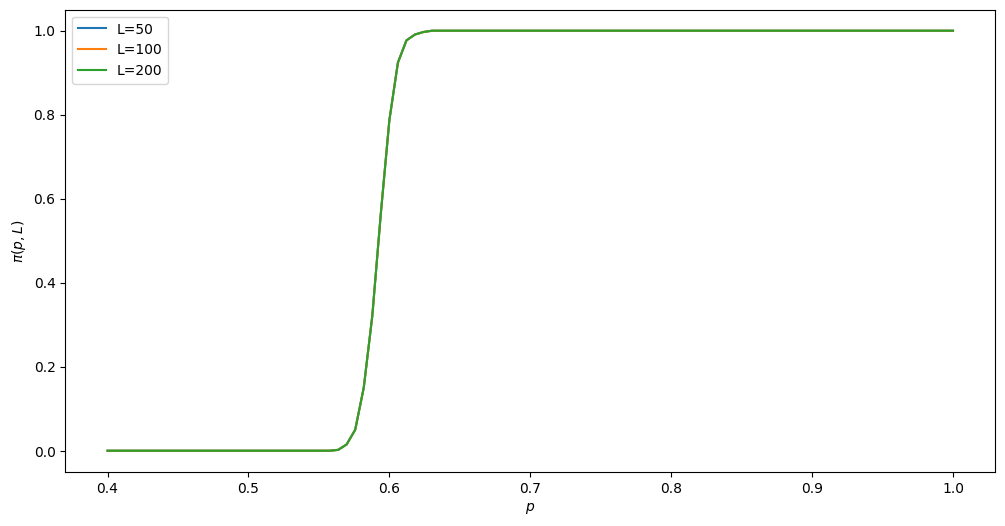

In [5]:
# Display Results
plt.figure(figsize=(12, 6))
pi = Ni/N
for li in range(ny):
    plt.plot(p, pi[ny-1], label='L=%d' % Ln[li])
    plt.legend()
plt.xlabel('$p$')
plt.ylabel('$\pi(p,L)$')


# 1.3: Spanning Clusters

The Probability Π(p, L) describes probability for there to be a spanning cluster (the property of a cluster to be able to percolate throughout the entire reference frame)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import measurements

In [7]:
p= np.linspace(0.4,1.0,100) # Create list of 100 p values between 0.4 and 1.0
Ln = [50,100,200]
nx = len(p)
ny = len(Ln)
Ni = np.zeros((ny, nx))
P = np.zeros((ny, nx))
N = 1000
for li in range(ny):
    L = Ln[li]
    for i in range(N): 
        z = np.random.rand(L,L)
        for ip  in range(nx): 
            m = z<p[ip] 
            lw, num = measurements.label(m) 
            perc_x = np.intersect1d(lw[0,:],lw[-1,:]) 
            perc = perc_x[np.where(perc_x>0)] 
            if  (len(perc)>0): 
                Ni[li][ip] += 1 
                area = measurements.sum(m, lw, perc[0]) 
                P[li][ip] += area 

C:\Users\gronk\AppData\Local\Temp\ipykernel_24024\2032855672.py:14: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  lw, num = measurements.label(m)
C:\Users\gronk\AppData\Local\Temp\ipykernel_24024\2032855672.py:19: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  area = measurements.sum(m, lw, perc[0])


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.97343750e-41 6.11562500e-41 7.20625000e-41 2.56750000e-40
 1.29076563e-39 5.67048438e-39 1.90451250e-38 5.16466719e-38
 1.04023719e-37 1.75768078e-37 2.39684234e-37 2.86279750e-37
 3.16350000e-37 3.36960391e-37 3.50291328e-37 3.61214609e-37
 3.70369625e-37 3.78567031e-37 3.85825453e-37 3.92702734e-37
 3.99013797e-37 4.04980453e-37 4.10618766e-37 4.15984016e-37
 4.21172406e-37 4.26163359e-37 4.30999922e-37 4.35736656e-37
 4.40346312e-37 4.44865016e-37 4.49313063e-37 4.53684516e-37
 4.57970937e-37 4.62213578e-37 4.66392328e-37 4.70545938e-37
 4.74689687e-37 4.78763141e-37 4.82799875e-37 4.86833609e-37
 4.90831859e-37 4.948042

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\gronk\AppData\Local\Temp\ipykernel_24024\4064995813.py:8: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel("$\Pi(p)$")


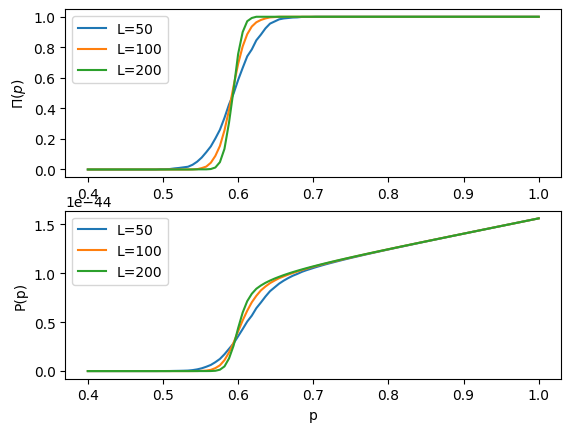

In [13]:
# Display Results

Pi = Ni/N   
plt.subplot(2,1,1)
for li in range(ny): 
    plt.plot(p,Pi[li],label='L=%d'%Ln[li]) 
    plt.legend()
plt.ylabel("$\Pi(p)$") 
plt.subplot(2,1,2) 
for li in range(ny):
    nP  =  P/(N*Ln[li]*Ln[li])  
    plt.plot(p,nP[li],label='L=%d'%Ln[li]) 
    plt.legend()
plt.ylabel("P(p)") 
plt.xlabel("p") 